In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Soumesh\Documents\Pandas notebooks\datasets\titles.csv")

In [3]:
df.drop("description", axis = 1, inplace=True)

In [4]:
df.head()

id                                title   type  release_year  \
0  ts300399  Five Came Back: The Reference Films   SHOW          1945   
1   tm84618                          Taxi Driver  MOVIE          1976   
2  tm154986                          Deliverance  MOVIE          1972   
3  tm127384      Monty Python and the Holy Grail  MOVIE          1975   
4  tm120801                      The Dirty Dozen  MOVIE          1967   

  age_certification  runtime                                       genres  \
0             TV-MA       51                            ['documentation']   
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']      1.0        NaN         NaN         NaN   
1               ['US']      NaN  tt0075314         8.2    808582.0   
2               ['US']      NaN  tt0068473         7.7    107673.0   
3               ['GB']      NaN  tt0071853         8.2    534486.0   
4         ['GB', 'US']      NaN  tt0061578         7.7     72662.0   

   tmdb_popularity  tmdb_score  
0            0.600         NaN  
1           40.965       8.179  
2           10.010       7.300  
3           15.461       7.811  
4           20.398       7.600

In [66]:
df.isna().sum()

id                      0
title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
decade                  0
dtype: int64

**Data preprocessing**

In [6]:
age_certification_mode = df["age_certification"].mode()
age_certification_mode

0    TV-MA
Name: age_certification, dtype: object

In [7]:
df["age_certification"].fillna("TV-MA", inplace=True)

In [8]:
df["seasons"].fillna(0, inplace=True)

In [9]:
imdb_score_mean = df["imdb_score"].mean()
df["imdb_score"].fillna(imdb_score_mean, inplace=True)

In [16]:
imdb_score_mean

6.510860655737705

In [10]:
df["tmdb_score"].fillna(0, inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.head()

id                            title   type  release_year  \
1   tm84618                      Taxi Driver  MOVIE          1976   
2  tm154986                      Deliverance  MOVIE          1972   
3  tm127384  Monty Python and the Holy Grail  MOVIE          1975   
4  tm120801                  The Dirty Dozen  MOVIE          1967   
5   ts22164     Monty Python's Flying Circus   SHOW          1969   

  age_certification  runtime                                       genres  \
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4             TV-MA      150                            ['war', 'action']   
5             TV-14       30                       ['comedy', 'european']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
1               ['US']      0.0  tt0075314         8.2    808582.0   
2               ['US']      0.0  tt0068473         7.7    107673.0   
3               ['GB']      0.0  tt0071853         8.2    534486.0   
4         ['GB', 'US']      0.0  tt0061578         7.7     72662.0   
5               ['GB']      4.0  tt0063929         8.8     73424.0   

   tmdb_popularity  tmdb_score  
1           40.965       8.179  
2           10.010       7.300  
3           15.461       7.811  
4           20.398       7.600  
5           17.617       8.306

In [68]:
df.shape

(5279, 15)

**What were the top 10 movies according to IMDB score?**

In [23]:
df[df["type"] == "MOVIE"].sort_values(by= "imdb_score", ascending=False)[["title", "imdb_score"]][:10]

title  imdb_score
1092         Chhota Bheem & Krishna vs Zimbara         9.1
4771                                     Major         9.1
2547                         C/o Kancharapalem         8.9
3271  David Attenborough: A Life on Our Planet         8.9
97                                Forrest Gump         8.8
237                                  Inception         8.8
435                                 Anbe Sivam         8.7
438                        A Lion in the House         8.7
792       Chhota Bheem & Krishna in Mayanagari         8.7
36                                  GoodFellas         8.7

**What were the top 10 shows according to IMDB score?**

In [25]:
df[df["type"] == "SHOW"].sort_values(by= "imdb_score", ascending=False)[["title", "imdb_score"]][:10]

title  imdb_score
216                 Breaking Bad         9.5
233   Avatar: The Last Airbender         9.3
3147                  Our Planet         9.3
1258                  Reply 1988         9.2
3500                Kota Factory         9.1
1886                   My Mister         9.1
3068              The Last Dance         9.1
4718                      Arcane         9.0
835              Attack on Titan         9.0
165                       Okupas         9.0

**What were the bottom 10 movies according to IMDB score?**

In [28]:
df[df["type"] == "MOVIE"].sort_values(by= "imdb_score", ascending=True)[["title", "imdb_score"]][:10]

title  imdb_score
1633                           Aerials         1.5
3623  Me Against You: Mr. S's Vendetta         1.6
1091                        Himmatwala         1.7
1577              Kyaa Kool Hain Hum 3         1.9
748                  FRED 3: Camp Fred         2.0
1695       Hajwala: The Missing Engine         2.0
19                             Dostana         2.1
2944                      B. A. Pass 2         2.2
5766                     Time to Dance         2.2
2555                   Nothing to Lose         2.3

**What were the bottom 10 shows according to IMDB score?** 

In [29]:
df[df["type"] == "SHOW"].sort_values(by= "imdb_score", ascending=True)[["title", "imdb_score"]][:10]

title  imdb_score
5695                     He's Expecting         2.0
5298  Thomas & Friends: All Engines Go!         2.0
5320                         Hype House         2.1
2838                  A House of Blocks         2.3
3598                         Until Dawn         2.4
3642                       The Goop Lab         2.5
5760                         Byron Baes         2.6
4791                        First Class         2.8
2093                       Bonus Family         2.9
1406                        Richie Rich         3.0

**What were the average IMDB and TMDB scores for shows and movies?**

In [32]:
df.groupby("type").mean()[["imdb_score", "tmdb_score"]].round(2)

C:\Users\Soumesh\AppData\Local\Temp\ipykernel_15016\193664635.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("type").mean()[["imdb_score", "tmdb_score"]].round(2)


imdb_score  tmdb_score
type                         
MOVIE        6.25        6.28
SHOW         6.98        7.26

**Count of movies and shows in each decade**

In [42]:
import math

df["decade"] = (df["release_year"]/10).apply(np.floor)*10

In [46]:
decade_movies = df.groupby("decade")["decade"].count()
decade_movies

decade
1950.0       5
1960.0       8
1970.0      18
1980.0      51
1990.0     114
2000.0     340
2010.0    3043
2020.0    1700
Name: decade, dtype: int64

Text(0.5, 1.0, 'Count of movies with respect to decades')

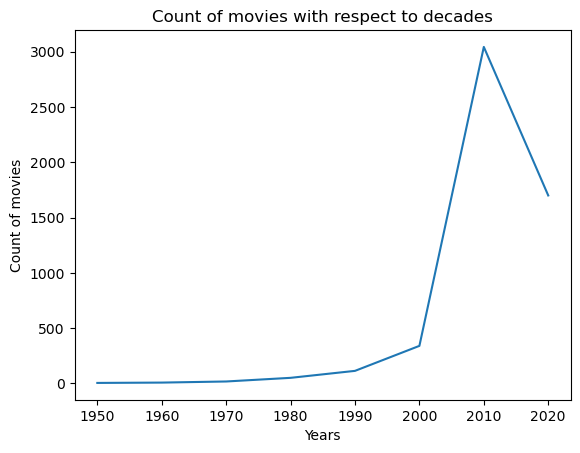

In [48]:
plt.plot(decade_movies.index, decade_movies.values)
plt.xlabel("Years")
plt.ylabel("Count of movies")
plt.title("Count of movies with respect to decades")

**What were the average IMDB and TMDB scores for each production country?**

In [52]:
df.groupby("production_countries").mean()[["imdb_score", "tmdb_score"]].round(2)

C:\Users\Soumesh\AppData\Local\Temp\ipykernel_15016\1803592417.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("production_countries").mean()[["imdb_score", "tmdb_score"]].round(2)


imdb_score  tmdb_score
production_countries                                        
['AE', 'FR', 'JO', 'LB', 'QA', 'PS']        7.00        5.90
['AE', 'LB']                                6.80        4.50
['AE', 'US']                                6.80        6.60
['AE']                                      4.69        4.16
['AR', 'CL']                                5.80        6.00
...                                          ...         ...
['ZA', 'US', 'CA']                          5.80        6.10
['ZA', 'US']                                5.20       10.00
['ZA']                                      5.46        5.87
['ZW']                                      6.00        6.10
[]                                          6.18        5.56

[424 rows x 2 columns]

**What were the average IMDB and TMDB scores for each age certification for shows and movies?**

In [60]:
df.groupby(by = ["age_certification"]).mean()[["imdb_score", "tmdb_score"]].round(2)

C:\Users\Soumesh\AppData\Local\Temp\ipykernel_15016\4067297492.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by = ["age_certification"]).mean()[["imdb_score", "tmdb_score"]].round(2)


imdb_score  tmdb_score
age_certification                        
G                        6.33        6.11
NC-17                    6.15        6.47
PG                       6.23        6.56
PG-13                    6.43        6.55
R                        6.30        6.46
TV-14                    7.22        7.30
TV-G                     6.33        7.42
TV-MA                    6.46        6.51
TV-PG                    6.92        7.12
TV-Y                     6.51        7.33
TV-Y7                    6.83        7.49

**What were the 5 most common age certifications for movies?**

In [65]:
df1 = df[df["type"] == "MOVIE"]
df1.groupby("age_certification").count()["id"].sort_values(ascending=False)[:5]

age_certification
TV-MA    2080
R         528
PG-13     428
PG        221
G          93
Name: id, dtype: int64

In [70]:
credits = pd.read_csv(r"C:\Users\Soumesh\Documents\Pandas notebooks\datasets\credits.csv")
credits.head()

person_id       id             name                character   role
0       3748  tm84618   Robert De Niro            Travis Bickle  ACTOR
1      14658  tm84618     Jodie Foster            Iris Steensma  ACTOR
2       7064  tm84618    Albert Brooks                      Tom  ACTOR
3       3739  tm84618    Harvey Keitel  Matthew 'Sport' Higgins  ACTOR
4      48933  tm84618  Cybill Shepherd                    Betsy  ACTOR

In [71]:
credits.shape

(77801, 5)

**Who were the top 20 actors that appeared the most in movies/shows?**

In [78]:
credits[credits["role"] == "ACTOR"]["name"].value_counts().sort_values(ascending=False)[:20]

Kareena Kapoor Khan      25
Boman Irani              25
Shah Rukh Khan           23
Takahiro Sakurai         21
Paresh Rawal             20
Amitabh Bachchan         20
Priyanka Chopra Jonas    20
Anupam Kher              19
Nawazuddin Siddiqui      19
Yuki Kaji                19
Junichi Suwabe           19
Fred Tatasciore          18
Om Puri                  18
Nassar                   18
Aamir Khan               18
Ajay Devgn               18
Fred Armisen             18
Kari Wahlgren            17
Kenjiro Tsuda            17
Murali Sharma            17
Name: name, dtype: int64

**Who were the top 20 directors that directed the most movies/shows?**

In [79]:
credits[credits["role"] == "DIRECTOR"]["name"].value_counts().sort_values(ascending=False)[:20]

Raúl Campos            20
Jan Suter              19
Ryan Polito            17
Jay Karas              15
Marcus Raboy           14
Jay Chapman            12
Cathy Garcia-Molina    12
Youssef Chahine        11
Anurag Kashyap          8
Kunle Afolayan          8
Justin G. Dyck          8
Suhas Kadav             8
Troy Miller             8
Fernando Ayllón         7
Lance Bangs             7
Shannon Hartman         7
Karan Johar             6
Milan Luthria           6
Martin Scorsese         6
Mae Cruz-Alviar         6
Name: name, dtype: int64

**Calculating the average runtime of movies and TV shows separately**

In [81]:
df.groupby("type").mean()["runtime"]

C:\Users\Soumesh\AppData\Local\Temp\ipykernel_15016\1926473430.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("type").mean()["runtime"]


type
MOVIE    101.410104
SHOW      38.842738
Name: runtime, dtype: float64

**Finding the titles and  directors of movies released on or after 2010**

In [103]:
df1 = df[df["release_year"] >= 2010]
df2 = df1.merge(credits, how="inner", on=["id"])
df2[df2["role"] == "DIRECTOR"][["title", "name", "release_year"]]

title               name  release_year
78                Inception  Christopher Nolan          2010
94                Insidious          James Wan          2010
149               Grown Ups       Dennis Dugan          2010
217         The Book of Eli       Allen Hughes          2010
218         The Book of Eli      Albert Hughes          2010
...                     ...                ...           ...
62615           Kongsi Raya         Teddy Chan          2022
62631  Princess 'Daya'Reese     Barry Gonzalez          2021
62647              My Bride      Mohamed Bakir          2021
62659             Fine Wine      Seyi Babatope          2021
62670               Lokillo     Julian Gaviria          2021

[3701 rows x 3 columns]

**Which shows on Netflix have the most seasons?**

In [111]:
df1 = df[df["type"] == "SHOW"]
df1.sort_values(by = "seasons", ascending=False)[:10][["title", "seasons"]]

title  seasons
91                   Survivor     42.0
48           Wheel of Fortune     39.0
101             The Challenge     37.0
217                  Top Gear     32.0
114             Power Rangers     29.0
95                    Pokémon     25.0
45           Thomas & Friends     24.0
261  America's Next Top Model     24.0
100                 One Piece     21.0
232                      NCIS     20.0

**Which genres had the most movies?**

In [118]:
df[df["type"] == "MOVIE"]["genres"].value_counts()[:10]

['comedy']                        343
['drama']                         182
['documentation']                 166
['comedy', 'documentation']       100
['comedy', 'drama']                74
['drama', 'romance']               73
['drama', 'comedy']                62
['comedy', 'romance']              57
['romance', 'comedy']              45
['comedy', 'drama', 'romance']     42
Name: genres, dtype: int64

**Which genres had the most shows**

In [119]:
df[df["type"] == "SHOW"]["genres"].value_counts()[:10]

['reality']                       102
['comedy']                         88
['documentation']                  88
['drama']                          74
['drama', 'romance']               47
['comedy', 'drama']                45
['drama', 'comedy']                38
['documentation', 'crime']         34
['crime', 'documentation']         24
['crime', 'drama', 'thriller']     24
Name: genres, dtype: int64

**Titles and Directors of movies with high IMDB scores (>7.5) and high TMDB popularity scores (>80)**

In [129]:
df1 = df[(df["imdb_score"] >= 7.5) & (df["tmdb_popularity"] > 80)]
df2 = df1.merge(credits, how="inner", on=["id"])
df2[df2["role"] == "DIRECTOR"][["title", "name"]]

title               name
138                     Titanic      James Cameron
223                   Inception  Christopher Nolan
262                      Naruto        Hayato Date
279           Boys Over Flowers        Jun Ki Sang
454       The Dark Knight Rises  Christopher Nolan
463             Hunter x Hunter    Hiroshi Koujina
569               The Conjuring          James Wan
596  How to Train Your Dragon 2       Dean DeBlois
705   A Silent Voice: The Movie       Naoko Yamada
795               Scissor Seven        He Xiaofeng
873               Kengan Ashura        Seiji Kishi
885          The Naked Director      Masaharu Take
916            Alchemy of Souls      Park Joon-hwa
926          All of Us Are Dead             JQ Lee
927          All of Us Are Dead        Kim Nam-soo
937                     My Name        Kim Jin-min
953           Business Proposal       Park Seon-ho
965          The Sound of Magic     Kim Seong-yoon

**What were the total number of titles for each year?**

In [132]:
df["release_year"].value_counts().sort_index(ascending=False)

2022    332
2021    703
2020    665
2019    732
2018    724
       ... 
1960      1
1959      1
1958      1
1956      1
1954      2
Name: release_year, Length: 62, dtype: int64

**Actors who have starred in the most highly rated movies or shows**

In [143]:
df1 = credits[credits["role"] == "ACTOR"]
df2 = df1.merge(df, how="inner", on=["id"])
df2[(df2["imdb_score"] > 8) & (df2["tmdb_score"] > 8)]["name"]

0           Robert De Niro
1             Jodie Foster
2            Albert Brooks
3            Harvey Keitel
4          Cybill Shepherd
               ...        
69371    Gokul J. Krishnan
69372    Pradeep S. Gautam
69373    Biswa Kalyan Rath
69374         Poonam Gupta
69375       Spandana Silla
Name: name, Length: 2629, dtype: object

**What were the top 3 most common genres?**

In [146]:
df["genres"].value_counts().sort_values(ascending=False)[:3]

['comedy']           431
['drama']            256
['documentation']    254
Name: genres, dtype: int64